# Background

In this notebook, I derive the equations I used to run the inference of the invasion Ne trajectory. Specifically, I derive the survival probability $S(u)$ of no change in ancestry between two loci that are $u$ Morgans apart. 

In [6]:
from sympy import *
from IPython.display import display, Math
init_printing()

First, we define the piecewise Ne trajectory of interest. 

In [7]:
t, Ne1, Ne2, t0, u = symbols('t Ne_1 Ne_2 t_0 u', positive=True)
alpha = symbols('alpha')
x = symbols('x')
Ne = Piecewise((Ne1*exp(-alpha*t), t <= t0), (Ne2, t>t0))
founders = Ne.subs({t: t0})
Ne

⎧     -α⋅t            
⎪Ne₁⋅ℯ      for t ≤ t₀
⎨                     
⎪   Ne₂     otherwise 
⎩                     

First, we derive the TMRCA density for the first piece: 

In [8]:
gamma1 = exp(alpha*t) / (2*Ne1)
Gamma1 = integrate(exp(alpha*x) / (2*Ne1), (x, 0, t))
tmrca1 = gamma1*exp(-Gamma1)
display(Math(r"f_1(t) = " + latex(tmrca1)))

<IPython.core.display.Math object>

If we ignore healing events, then the probability of no change in ancestry given that they coalesce $t$ generations ago:

In [9]:
piece1 = exp(-2*t*u) * tmrca1
display(Math(r"S_1(u, t) = " + latex(piece1)))

<IPython.core.display.Math object>

We will use Gaussian quadrature rules to approximate the integral $S_1(u) = \int_0^{t_0} S_1(u, t)\,dt$. To avoid overflow, we will also evaluate the integral when alpha is very close to zero as:

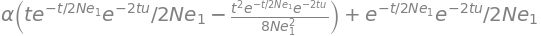

In [10]:
series(piece1, alpha, 0, 2).removeO()  

Next, we derive the $S_2(u, t)$ for the second piece:

In [17]:
gamma2 = 1 / (2*Ne2)
Gamma2 = (Gamma1.subs({t: t0})+ integrate(1 / (2*Ne2), (x, t0, t))).simplify()
tmrca2 = gamma2*exp(-Gamma2)
display(Math(r"f_2(t) = " + latex(tmrca2)))

<IPython.core.display.Math object>

In [18]:
piece2 = exp(-2*t*u) * tmrca2
display(Math(r"S_2(u, t) = " + latex(piece2)))

<IPython.core.display.Math object>

Finally, we numerically integrate: 

$S_b(u_i, u_j) = \int_{u_i}^{u_j}\, \int_{0}^{t_0} S_1(v, t)\, dt+ \int_{t_0}^\infty S_2(v, t)\,dt dv$